In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Step 1: Load dataset
df = pd.read_csv("Absenteeism_at_work_with_reasons.csv", delimiter=';')


In [14]:
# Step 2: Handle missing values
df['Reason for absence'] = df['Reason for absence'].fillna('Unknown')
df['Reason for absence'] = pd.factorize(df['Reason for absence'])[0]
df.drop(columns=['ID'], inplace=True)
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtypes != 'O' else col)
print("\nStep 1 & 2: Dataset after preprocessing:")
print(df.head())



Step 1 & 2: Dataset after preprocessing:
   Reason for absence  Month of absence  Day of the week  Seasons  \
0                   0                 7                3        1   
1                   1                 7                3        1   
2                   2                 7                4        1   
3                   3                 7                5        1   
4                   2                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   Hit target  Disciplinary fail

In [15]:
 #Step 3: Manual Standardization
data = df.values.astype(float)
means = np.sum(data, axis=0) / data.shape[0]
stds = np.sqrt(np.sum((data - means)**2, axis=0) / (data.shape[0] - 1))

standardized_data = (data - means) / stds
print("\nStep 3: First 5 rows after manual standardization:")
print(standardized_data[:5])


Step 3: First 5 rows after manual standardization:
[[-0.83243318  0.19662959 -0.64351209 -1.38923497  1.01072477  0.42926533
   0.10170099 -0.53250828 -0.81765938  0.63825412 -0.23888415 -0.43356417
   0.8931187   0.87228158 -0.28037622  0.19271948  0.85109724 -0.01903313
   0.77540777 -0.21936274]
 [-0.62558276  0.19662959 -0.64351209 -1.38923497 -1.5433353  -1.12093538
   1.24198476  2.09144558 -0.81765938  0.63825412  4.18047262 -0.43356417
  -0.01722267  0.87228158 -0.28037622 -0.5658572   1.47206047  0.97516826
   1.00875538 -0.5194153 ]
 [-0.41873234  0.19662959  0.0598837  -1.38923497 -0.63223785  1.4402658
   1.24198476  0.23924285 -0.81765938  0.63825412 -0.23888415 -0.43356417
  -0.92756405  0.87228158 -0.28037622 -0.5658572   0.77347683 -0.3504336
   1.00875538 -0.36938902]
 [-0.21188192  0.19662959  0.76327948 -1.38923497  0.86136453 -1.66013563
   0.32975774  0.39359308 -0.81765938  0.63825412 -0.23888415 -0.43356417
   0.8931187   0.87228158  3.56181647 -0.5658572  -0.85

In [16]:
# Step 4: Covariance Matrix (manual calculation)
n_samples = standardized_data.shape[0]
cov_matrix = (standardized_data.T @ standardized_data) / (n_samples - 1)
print("\nStep 4: Covariance Matrix (first 5x5):")
print(cov_matrix[:5, :5])



Step 4: Covariance Matrix (first 5x5):
[[ 1.          0.02819695 -0.08140539  0.01918283  0.02398065]
 [ 0.02819695  1.         -0.00652801  0.40776958  0.13752457]
 [-0.08140539 -0.00652801  1.          0.04649347  0.03398824]
 [ 0.01918283  0.40776958  0.04649347  1.          0.03699487]
 [ 0.02398065  0.13752457  0.03398824  0.03699487  1.        ]]


In [17]:
# Step 5: Eigenvalues and Eigenvectors (without using built-in cov/eig functions)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [18]:
# Step 6: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("\nStep 5 & 6: Top 5 Eigenvalues:")
print(eigenvalues[:5])



Step 5 & 6: Top 5 Eigenvalues:
[3.34868617 2.26810642 1.69773396 1.59149193 1.42946843]


In [19]:
# Step 7: Pick top k eigenvectors
# Step 7: Pick top k eigenvectors
k = 2
top_k_eigenvectors = eigenvectors[:, :k]

# ✅ Step 8: Safe matrix transformation
if np.any(np.isnan(standardized_data)) or np.any(np.isinf(standardized_data)):
    raise ValueError("Standardized data contains NaN or Inf values.")

if np.any(np.isnan(top_k_eigenvectors)) or np.any(np.isinf(top_k_eigenvectors)):
    raise ValueError("Eigenvectors contain NaN or Inf values.")

transformed_data = standardized_data @ top_k_eigenvectors

/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_1804/1756056962.py:13: RuntimeWarning: divide by zero encountered in matmul
  transformed_data = standardized_data @ top_k_eigenvectors
/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_1804/1756056962.py:13: RuntimeWarning: overflow encountered in matmul
  transformed_data = standardized_data @ top_k_eigenvectors
/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_1804/1756056962.py:13: RuntimeWarning: invalid value encountered in matmul
  transformed_data = standardized_data @ top_k_eigenvectors


In [20]:
# Step 8: Transform the original matrix
transformed_data = standardized_data @ top_k_eigenvectors

/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_1804/737198471.py:2: RuntimeWarning: divide by zero encountered in matmul
  transformed_data = standardized_data @ top_k_eigenvectors
/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_1804/737198471.py:2: RuntimeWarning: overflow encountered in matmul
  transformed_data = standardized_data @ top_k_eigenvectors
/var/folders/vh/ngjg15f137bf19ltk361pvhm0000gn/T/ipykernel_1804/737198471.py:2: RuntimeWarning: invalid value encountered in matmul
  transformed_data = standardized_data @ top_k_eigenvectors


In [21]:
# Step 9: Display transformed data
transformed_df = pd.DataFrame(transformed_data, columns=[f'PC{i+1}' for i in range(k)])
print("\nStep 9: Transformed Data (first 5 rows):")
print(transformed_df.head())



Step 9: Transformed Data (first 5 rows):
        PC1       PC2
0  0.836997  1.226802
1  3.493614 -1.034952
2  2.209097  0.100742
3 -0.530011  0.097368
4  0.748446  1.306988


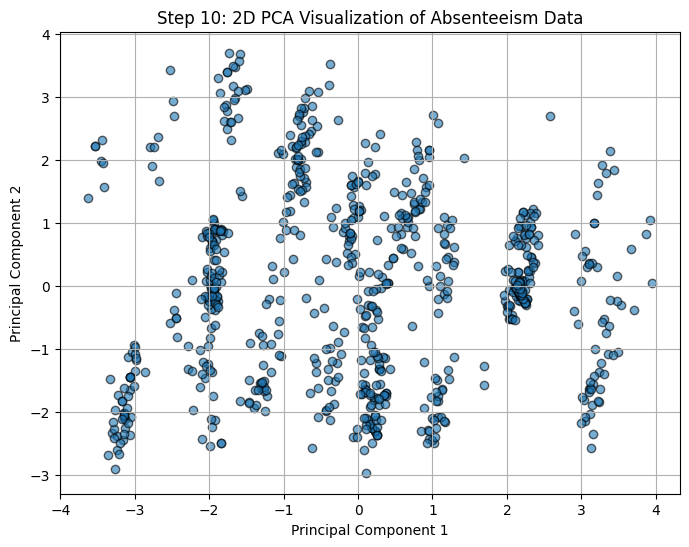

In [22]:
# Step 10: Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'], alpha=0.6, edgecolors='k')
plt.title('Step 10: 2D PCA Visualization of Absenteeism Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()